In [33]:
import pandas as pd
pd.set_option('display.max_columns', None) # para mostrar todas las columnas


# Carga de archivos a ocupar

path_jobpost = "job_postings.csv"
path_comp_det = "companies.csv"
path_comp_ind = "company_industries.csv"
path_comp_q = "employee_counts.csv"

df_jobpost = pd.read_csv(path_jobpost)
df_comp_det = pd.read_csv(path_comp_det)
df_comp_ind = pd.read_csv(path_comp_ind)
df_comp_q = pd.read_csv(path_comp_q)

In [34]:
#!pip install xlsxwriter

## Descripción archivo job_postings.csv

#### Columnas

- **job_id**: identificador unico - join
- **company_id**: identificador único - join
- **title**: nombre del cargo -  
- description: texto con la descripción del cargo - no ocupar
- **max_salary, med_salary, min_salary**: salario que está en la publicación
- **pay_period**: tipo de salario publicado
- **formatted_work_type**: tipo de horario de trabajo
- **location**: lugar del trabajo
- **applies**: cantidad de personas que aplican al trabajo
- original_listed_time: no tenemos idea (la misma fecha)
- **remote_allowed**: trabajo remoto o no
- **views**: veces que se ha visto la publicación
- job_posting_url: ?
- application_type: ?
- expiry:
- closed_time: ?
- **formatted_experience_level**: nivel del trabajo ofrecido
- skills_desc: ?
- listed_time: ?
- posting_domain:
- **sponsored**: publicación promocionada o no
- work_type: parece que es similar formatted_work_type
- **currency**: tipo de moneda del salario
- **compensation_type**: tipo de compensación

In [35]:
df_jobpost.sample(5)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
5115,3693587394,164527.0,Warehouse Associate I,"Riverside, CA - 2360 Cottonwood Ave\nJob Title...",NaN,NaN,NaN,NaN,Full-time,"Riverside, CA",1.0,1.690000e+12,NaN,2.0,https://www.linkedin.com/jobs/view/3693587394/...,https://careers.jbhunt.com/jobdescription.aspx...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,careers.jbhunt.com,0,FULL_TIME,NaN,NaN
13123,3701199654,6919.0,Information Security Analyst,Job Title: Lead Information Security Analyst –...,80.0,NaN,75.0,HOURLY,Contract,"Charlotte, NC",NaN,1.690000e+12,NaN,216.0,https://www.linkedin.com/jobs/view/3701199654/...,NaN,ComplexOnsiteApply,1.700000e+12,1.690000e+12,Associate,NaN,1.690000e+12,NaN,0,CONTRACT,USD,BASE_SALARY
12620,3700552890,73013724.0,Sales Manager,Position Summary: Our Sales Manager has managi...,175000.0,NaN,125000.0,YEARLY,Full-time,"Grand Forks, ND",NaN,1.690000e+12,1.0,NaN,https://www.linkedin.com/jobs/view/3700552890/...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
9534,3697394084,6176.0,Sales Associate,Overview\nCrew positions are entry level oppor...,NaN,NaN,NaN,NaN,Part-time,"Harlingen, TX",1.0,1.690000e+12,NaN,2.0,https://www.linkedin.com/jobs/view/3697394084/...,https://careers.7-eleven.com/jobs/244493?lang=...,OffsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,careers.7-eleven.com,1,PART_TIME,NaN,NaN
827,3693045307,6915.0,Tribe Manager,\n\nAre you ready to make an impact at DTCC? ...,NaN,NaN,NaN,NaN,Full-time,"Jersey City, NJ",3.0,1.690000e+12,NaN,86.0,https://www.linkedin.com/jobs/view/3693045307/...,https://ars2.equest.com/?response_id=fe5e0a9c0...,OffsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,ars2.equest.com,0,FULL_TIME,NaN,NaN


In [36]:
df_jobpost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   description                 15885 non-null  object 
 4   max_salary                  5521 non-null   float64
 5   med_salary                  981 non-null    float64
 6   min_salary                  5521 non-null   float64
 7   pay_period                  6502 non-null   object 
 8   formatted_work_type         15886 non-null  object 
 9   location                    15886 non-null  object 
 10  applies                     8700 non-null   float64
 11  original_listed_time        15886 non-null  float64
 12  remote_allowed              2340 non-null   float64
 13  views                       131

## Descripción archivo companies.csv

#### Columnas
- **company_id**
- name
- description
- **company_size**
- state
- country
- city
- zip_code
- address
- url

In [37]:
df_comp_det.sample(10)

,company_id,name,description,company_size,state,country,city,zip_code,address,url
3110,2429989,World Insurance Associates LLC,World Insurance Associates is a unique insuran...,5.0,New Jersey,US,Iselin,08830,100 Wood Ave S,https://www.linkedin.com/company/world-insuran...
1702,157345,Sallie Mae,Sallie Mae’s mission is to power confidence as...,5.0,DE,US,Newark,19713,300 Continental Drive,https://www.linkedin.com/company/salliemae
4261,12951519,Provision People,"We are Provision People (provisionpeople.com),...",1.0,CA,US,Solana Beach,92075,125 S Highway 101,https://www.linkedin.com/company/thruvia-services
84,1970,Rabobank,Coöperatieve Rabobank U.A. is a full-range fin...,7.0,Utrecht,NL,Utrecht,3521CB,Croeselaan 18,https://www.linkedin.com/company/rabobank
2183,414551,"Kaygen, Inc.","Kaygen, an award-winning technology consulting...",2.0,California,US,Irvine,92618,100 Spectrum Center Drive,https://www.linkedin.com/company/kaygen-inc
257,4099,University of Wisconsin-Madison,"In achievement and prestige, the University of...",7.0,WI,US,Madison,53706-1380,500 Lincoln Dr,https://www.linkedin.com/school/uwmadison/
5838,90726870,Trinity Pacific Consultants,"At Trinity Pacific, we evolve with innovative ...",1.0,CO,US,Denver,80111,0,https://www.linkedin.com/company/trinity-pacif...
5162,62556574,Peace Love Med Aesthetic Rejuvenation,Welcome to a completely new take on an aesthet...,NaN,Florida,US,Boca Raton,33432,151 SE Mizner Blvd,https://www.linkedin.com/company/peace-love-med
5682,82315512,Restore Wellness - Outpatient Therapy,Restore Wellness provides outpatient therapy r...,1.0,TX,US,Dallas Metroplex,0,0,https://www.linkedin.com/company/restore-welln...
2101,331239,Timberland Partners,Timberland Partners is a real estate investmen...,3.0,Minnesota,US,Minneapolis,55437,8500 Normandale Lake Blvd,https://www.linkedin.com/company/timberland-pa...


In [38]:
df_comp_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    6063 non-null   int64  
 1   name          6063 non-null   object 
 2   description   5999 non-null   object 
 3   company_size  5474 non-null   float64
 4   state         6060 non-null   object 
 5   country       6063 non-null   object 
 6   city          6063 non-null   object 
 7   zip_code      6055 non-null   object 
 8   address       6058 non-null   object 
 9   url           6063 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 473.8+ KB


## Descripción archivo company_industries.csv

#### Columnas
- **company_id**
- **industry**

In [39]:
df_comp_ind.sample(10)

,company_id,industry
4326,134993,Mechanical Or Industrial Engineering
15137,2272345,Information Technology & Services
7710,1258855,Staffing & Recruiting
12551,59042493,Supermarkets
3568,629227,Food & Beverages
7049,71316538,Events Services
13094,14796450,Staffing & Recruiting
7178,1286891,Staffing & Recruiting
7479,9308035,Information Technology & Services
12131,12606850,Hospital & Health Care


In [40]:
df_comp_ind.sort_values(by='company_id')

,company_id,industry
8497,1009,Information Technology & Services
8488,1009,Information Technology & Services
8490,1009,Information Technology & Services
8491,1009,Information Technology & Services
8486,1009,Information Technology & Services
...,...,...
12673,98530571,Outsourcing/Offshoring
13090,98531368,Staffing & Recruiting
258,98550552,Public Relations & Communications
12698,98556556,Non-profit Organization Management


### Existen valores duplicados en archivo company_industries.csv

In [41]:
df_comp_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  15880 non-null  int64 
 1   industry    15880 non-null  object
dtypes: int64(1), object(1)
memory usage: 248.2+ KB


## Descripción archivo employee_counts.csv

#### Columnas
- **company_id**
- **employee_count**
- **follower_count**
- time_recorded

In [42]:
df_comp_q.sample(10)

,company_id,employee_count,follower_count,time_recorded
694,11742196,17,170,1.692818e+09
7772,28978143,2607,23561,1.692849e+09
15254,82320999,3,30,1.692867e+09
200,1441,285743,30762143,1.692685e+09
8708,19180,4658,35715,1.692851e+09
11242,2722,13621,285832,1.692859e+09
5671,106707,33,36793,1.692842e+09
5057,1969276,192,11010,1.692840e+09
9156,27752,955,12295,1.692853e+09
2225,65487140,1,100,1.692832e+09


In [43]:
df_comp_q.sort_values(by='company_id')

,company_id,employee_count,follower_count,time_recorded
8508,1009,316130,16114398,1.692851e+09
8519,1009,316130,16114399,1.692851e+09
8518,1009,316130,16114399,1.692851e+09
8517,1009,316130,16114399,1.692851e+09
8504,1009,316130,16114398,1.692851e+09
...,...,...,...,...
12693,98530571,0,1,1.692861e+09
13111,98531368,2,1170,1.692862e+09
258,98550552,0,29,1.692685e+09
12718,98556556,0,2,1.692862e+09


## Tratamiento de datos

- Para cada archivo se seleccionan las columnas relevantes para el análisis
- Se genera un nuevo dataframe con la unión de los archivos y las columnas de interés
- Se eliminan duplicados

In [44]:
## Se seleccionan las columnas que son de interés para el análisis

col_sel = ['job_id','company_id','title','max_salary','med_salary', 'min_salary','pay_period','formatted_work_type','location','applies','remote_allowed',
            'views','formatted_experience_level','sponsored']
            
# 'currency' y 'compensation_type' no se consideran en el análisis, ya que no aportan información relevante.

## se crea un dataframe df_data nuevo con las columnas seleccionadas. Este dataframe será utilizado para el análisis.
df_data = df_jobpost[col_sel]

## se crea un dataframe df_merge con las columnas de interés de la tabla company_details
col_sel = ['company_id','company_size']
df_merge = df_comp_det[col_sel].drop_duplicates()
df_data = df_data.merge(df_merge, how='left', on='company_id')

## se crea un dataframe df_merge con las columnas de interés de la tabla company_industry
df_merge = df_comp_ind.drop_duplicates()
df_data = df_data.merge(df_merge, how='left', on='company_id')

## se crea un dataframe df_merge con las columnas de interés de la tabla employees_counts
col_sel = ['company_id','employee_count','follower_count']
# existen distintos valores de employee_count y follower_count para un mismo company_id, por lo que se toma el máximo valor de cada uno.
df_merge = df_comp_q.groupby(['company_id']).agg({'employee_count':'max','follower_count':'max'}).reset_index()
df_data = df_data.merge(df_merge, how='left', on='company_id')


In [45]:
df_data.sample(10)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,formatted_experience_level,sponsored,company_size,industry,employee_count,follower_count
7283,3694148606,278880.0,Banking conversion specialist,NaN,NaN,NaN,NaN,Full-time,United States,NaN,1.0,2.0,Entry level,0,7.0,Information Technology & Services,12341.0,533430.0
4287,3693073642,91610647.0,Claims Systems Configuration Senior Analyst - ...,NaN,NaN,NaN,NaN,Full-time,"Franklin, TN",11.0,NaN,118.0,Mid-Senior level,0,7.0,Hospital & Health Care,1257.0,21799.0
158,3690601234,18801226.0,Senior Staff Accountant,80000.0,NaN,60000.0,YEARLY,Full-time,"Dyersville, IA",22.0,NaN,104.0,NaN,1,NaN,Accounting,75.0,300.0
2370,3693052142,2911.0,Sr. User Experience Designer (UX),NaN,NaN,NaN,NaN,Full-time,"Dallas, TX",69.0,NaN,156.0,Mid-Senior level,0,7.0,Retail,88949.0,170939.0
8345,3697376713,1603.0,QA Specialist II- Lab Quality,NaN,NaN,NaN,NaN,Full-time,"Gaithersburg, MD",14.0,NaN,99.0,Entry level,1,7.0,Pharmaceuticals,65607.0,2557301.0
8865,3697384132,19349.0,Senior Design Engineer – Water Infrastructure,150000.0,NaN,110000.0,YEARLY,Contract,"Los Angeles, CA",1.0,NaN,20.0,NaN,1,5.0,Environmental Services,1266.0,19912.0
2172,3693051277,NaN,OTR Truck Driver,64000.0,NaN,60000.0,YEARLY,Full-time,"Dothan, AL",1.0,1.0,7.0,NaN,0,NaN,NaN,NaN,NaN
4135,3693072070,1286891.0,PHP Full Stack Web Developer,NaN,NaN,NaN,NaN,Full-time,"Wichita, KS",30.0,NaN,43.0,NaN,0,4.0,Staffing & Recruiting,695.0,75616.0
2932,3693058144,3195033.0,Clinical Supervisor,NaN,NaN,NaN,NaN,Full-time,"Ludlow, MA",NaN,NaN,4.0,Mid-Senior level,0,4.0,Mental Health Care,474.0,2230.0
8548,3697380531,139348.0,Flu Clinic RN-OH,NaN,NaN,NaN,NaN,Full-time,"Cincinnati, OH",2.0,NaN,12.0,Mid-Senior level,0,3.0,Staffing & Recruiting,170.0,18789.0


hipotesis
-  los empleos mejores pagados corresponden a empresas grandes/
-  en los encargos de entredas hay mas postulantes / u
-  los cargos mas vistos son los cargos que permiten trabajo remoto %
-  hay industrias donde la mayoria de los cargos, corresponden a cargos de entrada/
-  


In [46]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15886 entries, 0 to 15885
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   max_salary                  5521 non-null   float64
 4   med_salary                  981 non-null    float64
 5   min_salary                  5521 non-null   float64
 6   pay_period                  6502 non-null   object 
 7   formatted_work_type         15886 non-null  object 
 8   location                    15886 non-null  object 
 9   applies                     8700 non-null   float64
 10  remote_allowed              2340 non-null   float64
 11  views                       13123 non-null  float64
 12  formatted_experience_level  10984 non-null  object 
 13  sponsored                   158

In [47]:
df_data.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,remote_allowed,views,sponsored,company_size,employee_count,follower_count
count,1.588600e+04,1.552000e+04,5.521000e+03,981.000000,5521.000000,8700.000000,2340.0,13123.000000,15886.000000,14775.000000,15520.000000,1.552000e+04
mean,3.691293e+09,1.084100e+07,8.833622e+04,41167.664404,62352.218073,22.833103,1.0,76.776575,0.289248,4.849069,19900.064111,7.585305e+05
std,1.028617e+08,2.313688e+07,9.068282e+04,93682.094905,59487.692283,54.892826,0.0,167.459105,0.453428,2.059515,76884.530724,3.627265e+06
min,8.500877e+07,1.009000e+03,1.000000e+01,10.000000,10.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,3.693071e+09,1.301100e+04,4.800000e+01,18.000000,38.000000,2.000000,1.0,6.000000,0.000000,3.000000,177.000000,1.018150e+04
50%,3.697358e+09,2.777685e+05,8.200000e+04,26.000000,60000.000000,6.000000,1.0,25.000000,0.000000,5.000000,1625.000000,4.766500e+04
75%,3.699413e+09,7.798499e+06,1.400000e+05,52000.000000,99000.000000,21.000000,1.0,78.000000,1.000000,7.000000,10523.750000,2.319470e+05
max,3.701374e+09,9.856222e+07,1.300000e+06,998426.000000,800000.000000,1615.000000,1.0,5656.000000,1.000000,7.000000,829111.000000,3.189121e+07


In [48]:
## se guarda archivo csv con los datos procesados
#df_data.to_csv("job_trabajo.csv",sep=';')

<AxesSubplot:>

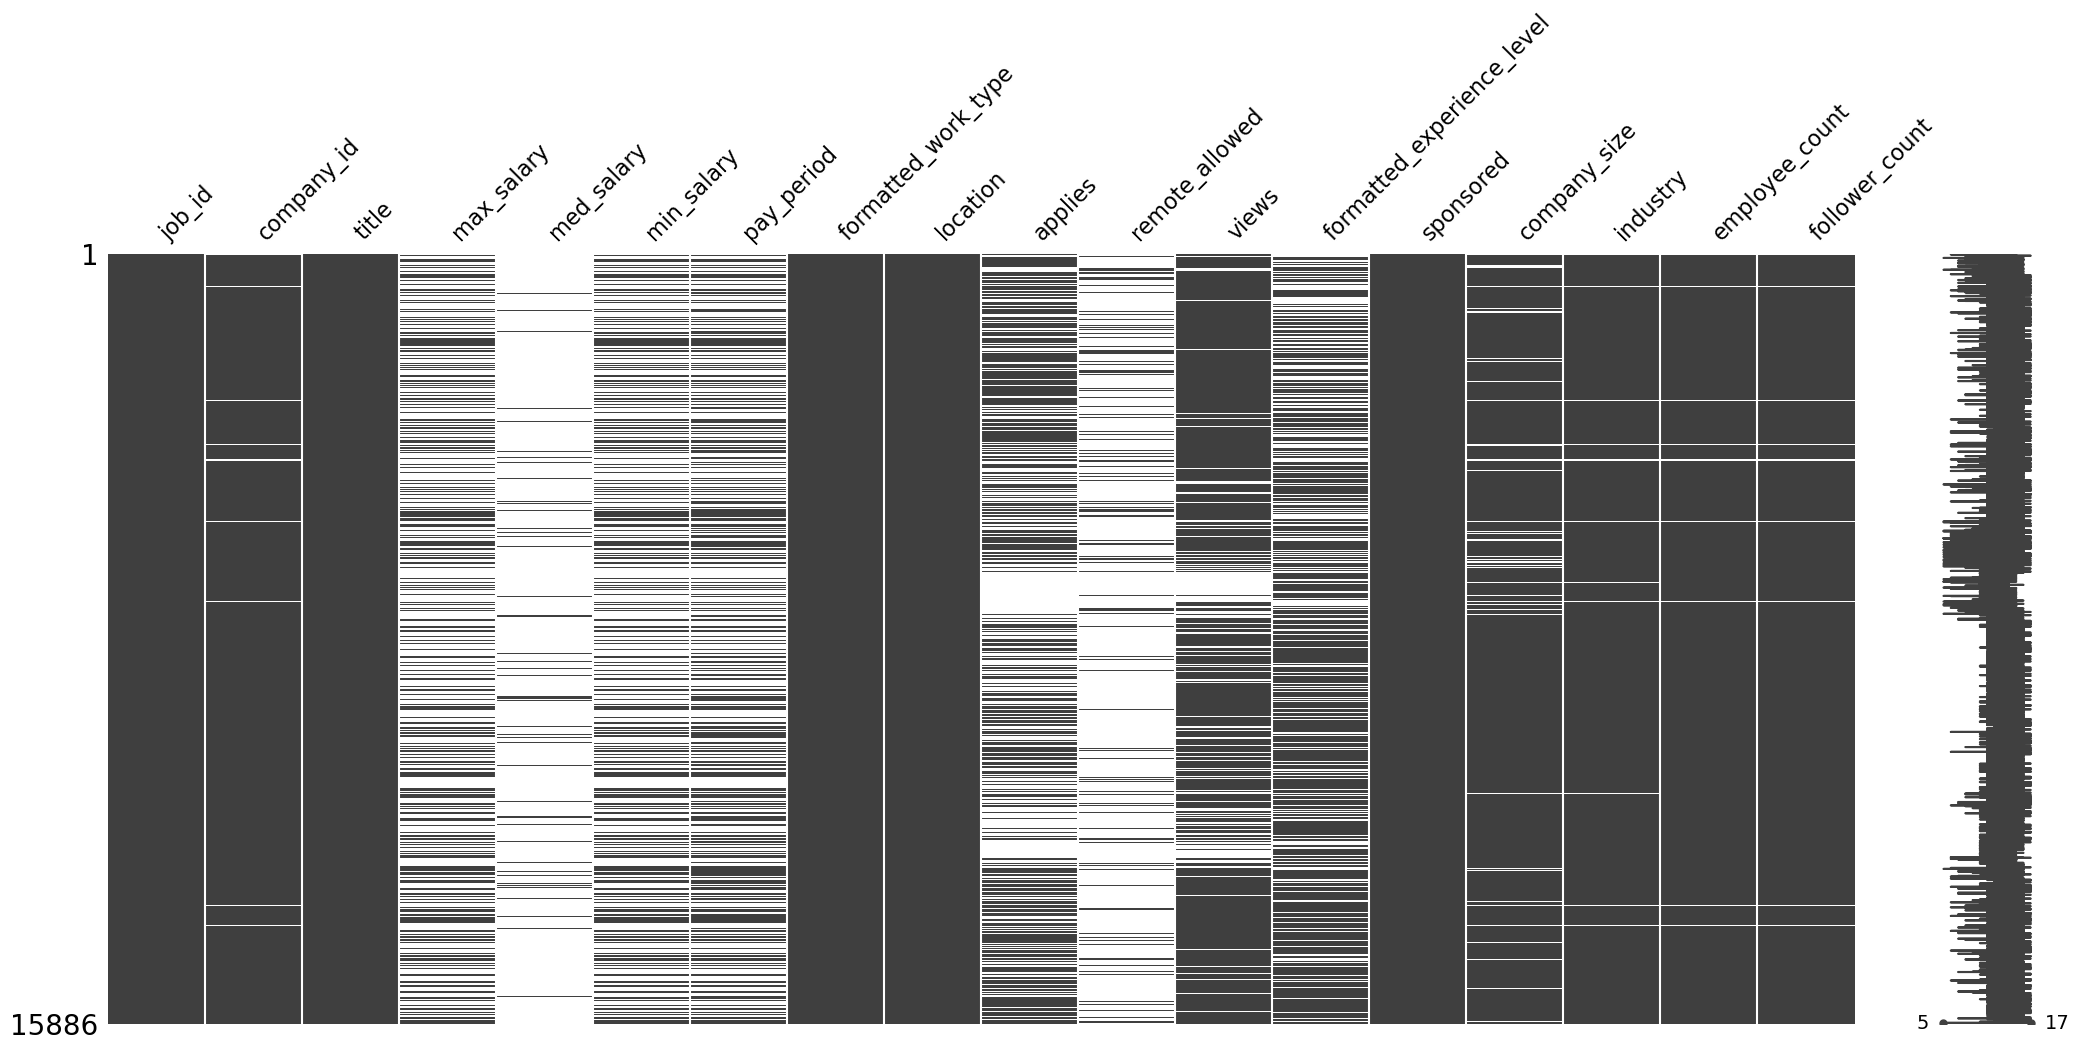

In [49]:
import missingno as msno
%matplotlib inline
msno.matrix(df_data)

<AxesSubplot:>

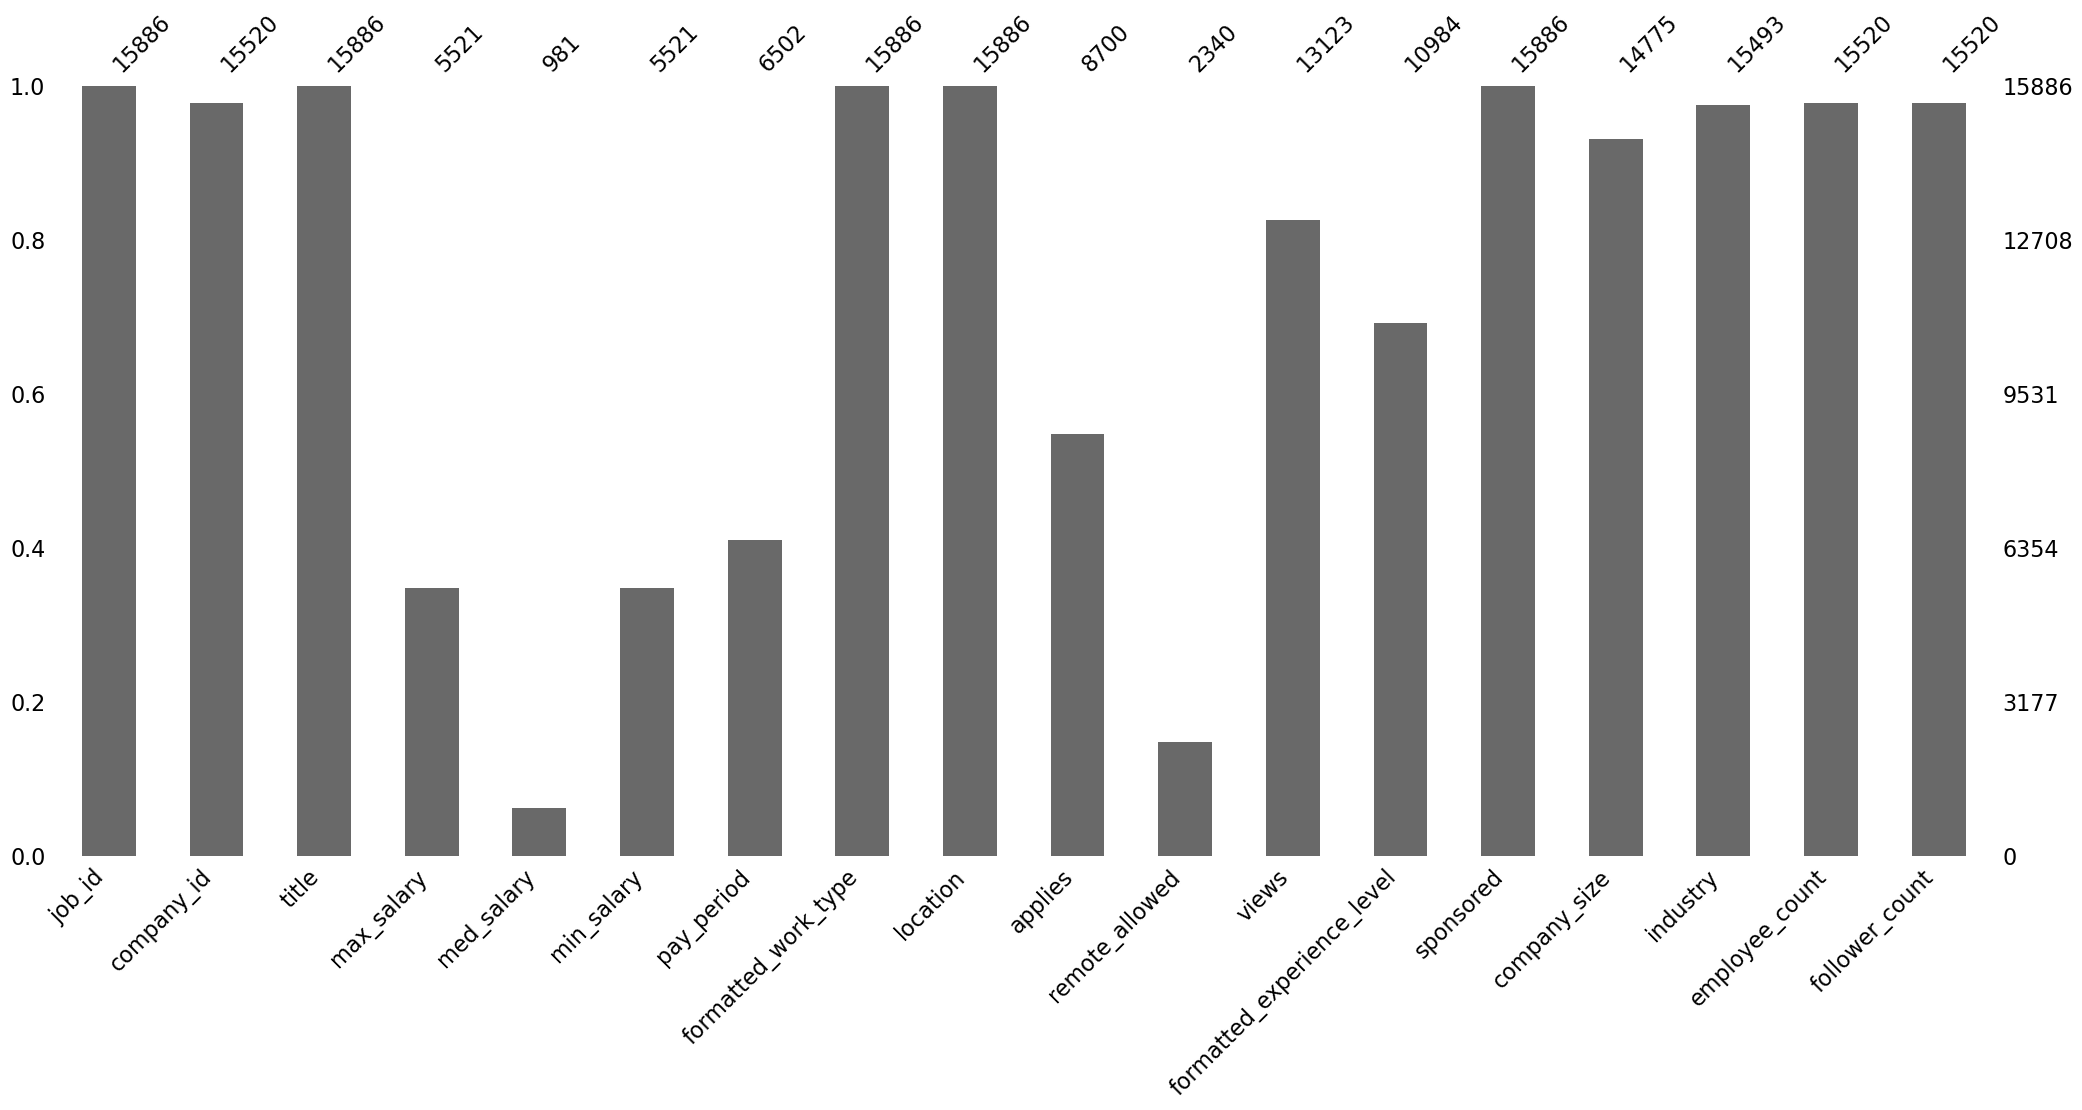

In [50]:
msno.bar(df_data)

# Tratamiento de valores nulos

### Por hacer

- **Eliminar** registros con valores nulos en columnas company_id, min_salry, max_salary, formatted_experience_level.
- Eliminar registros con pay_period = 'MONTHLY' y nulos.
- Imputar el valor med_salary con el **valor medio** entre max y min salary
- Imputar con 0 registros nulos en applies, remote_allowed, views,
- Eliminar columna currency, compensation_type
-

In [51]:
#path = "JobPost Analisis.xlsx"

#writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
#df_jobpost.to_excel(writer, sheet_name = 'JobPost')
#df_comp_det.to_excel(writer, sheet_name = 'Company details')
#df_comp_ind.to_excel(writer, sheet_name = 'Company industries')
#df_comp_q.to_excel(writer, sheet_name = 'Employee counts')
#writer.close()

In [52]:
#eliminar registros con valores nulos en columnas
#df = df_data.dropna(subset=['company_id', 'min_salary', 'max_salary', 'formatted_experience_level'])
df_data.dropna(subset=['company_id', 'min_salary', 'formatted_experience_level'], inplace=True)

In [53]:
#eliminar registros
# df = df[(df['pay_period'] != 'MONTHLY') | (df.isnull().any(axis=1) == False)] 


In [54]:
#imputar el valor
#df_data['med_salary'] = (df_data['min_salary'] + df_data['max_salary']) / 2

In [55]:
#imputar con 0 registros
df_data['applies'].fillna(0, inplace=True)
df_data['remote_allowed'].fillna(0, inplace=True)
df_data['views'].fillna(0, inplace=True)

<AxesSubplot:>

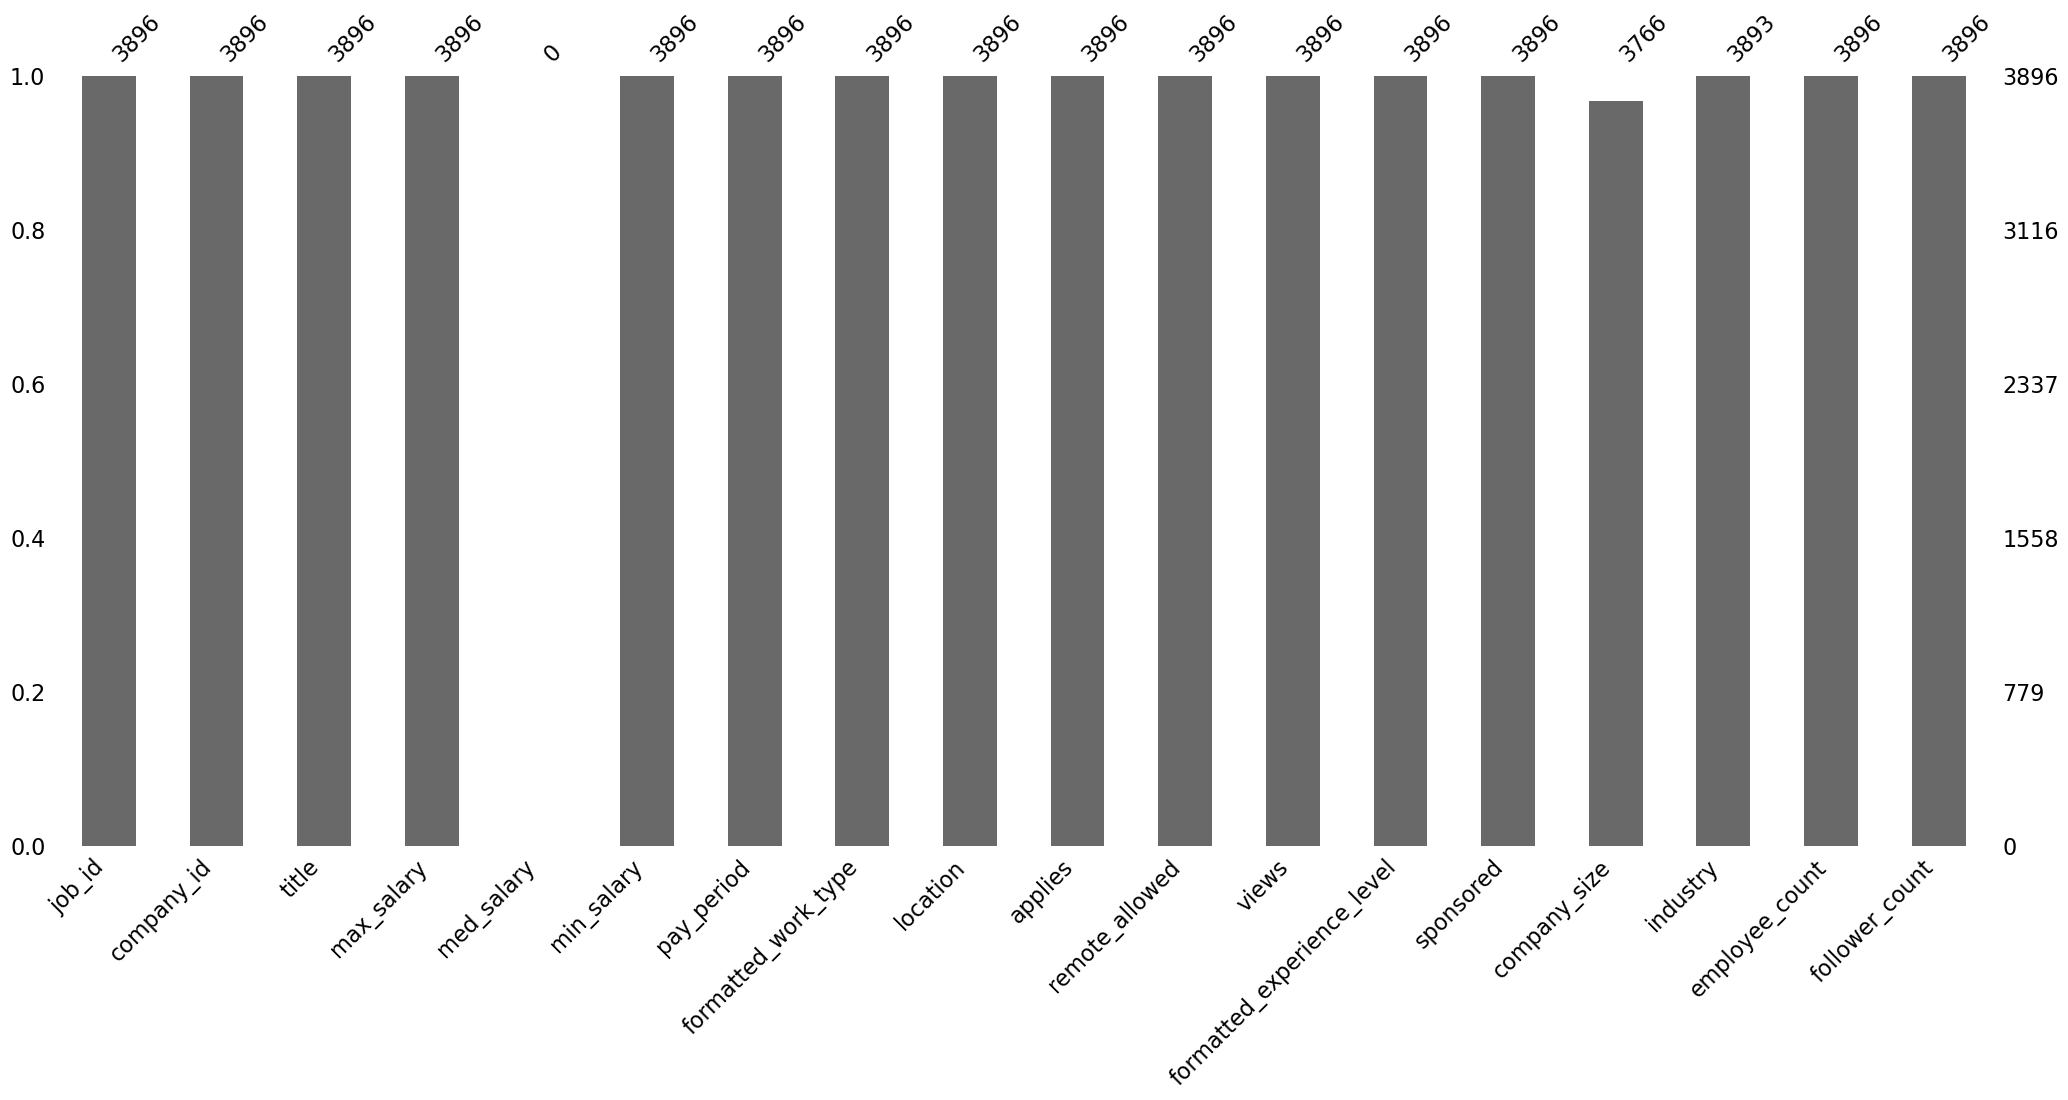

In [56]:
msno.bar(df_data)

In [62]:
df_data.head()
no_cols = ['med_salary','max_salary']
df_data.drop(columns=no_cols, axis=1).to_csv("linkedinJob_data.csv",sep=';')

# Preguntas

- Cantidad de postulantes a cargos con salarios altos / dónde se concentran la mayor cantidad de postulantes en base a los salarios máximos ofrecidos?
- existe alguna diferencia en los salarios ofrecidos para cargos con posiciones remotas?
- cuáles son los rangos salariales según el nivel de experiencia requerido

In [ ]:
#col = 'remote_allowed'
#col = 'formatted_experience_level'
#col = 'currency'
#col = 'compensation_type'
#col = 'pay_period'
#col = 'formatted_work_type'
col = 'applies'
df_data[col].isnull().sum() / len(df_data)

0.45234797935288934

In [ ]:
df_data[col].value_counts() # sirve para contar valores pero no te muestra el conteo de null

1.0      1672
2.0       884
3.0       628
4.0       504
5.0       386
         ... 
554.0       1
980.0       1
185.0       1
618.0       1
221.0       1
Name: applies, Length: 285, dtype: int64

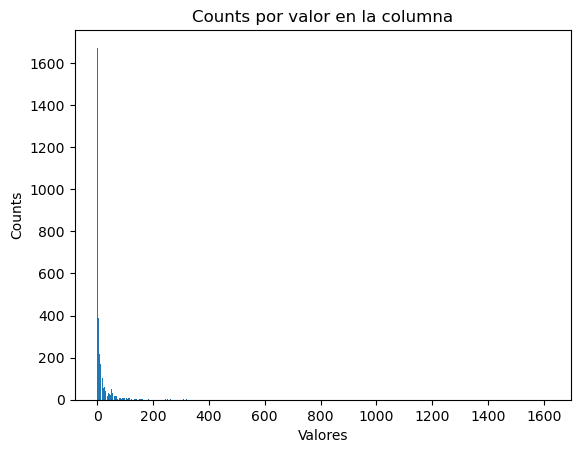

In [ ]:
import matplotlib.pyplot as plt
#df_data['applies'].unique()

value_counts = df_data[col].value_counts()

# Crear el gráfico de barras
plt.bar(value_counts.index, value_counts.values)

# Añadir etiquetas
plt.xlabel('Valores')
plt.ylabel('Counts')
plt.title('Counts por valor en la columna')

# Mostrar el gráfico
plt.show()

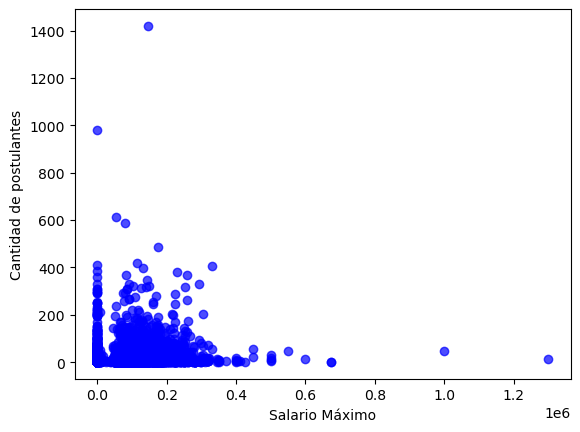

In [ ]:
# Crea el scatter plot
x = df_data['max_salary']
y = df_data['applies']
plt.scatter(x, y, color='blue', alpha=0.7)  # 'alpha' controla la transparencia

# Añade etiquetas y título
plt.xlabel('Salario Máximo')
plt.ylabel('Cantidad de postulantes')
#plt.title('Scatter Plot de dos variables numéricas')

# Muestra el scatter plot
plt.show()

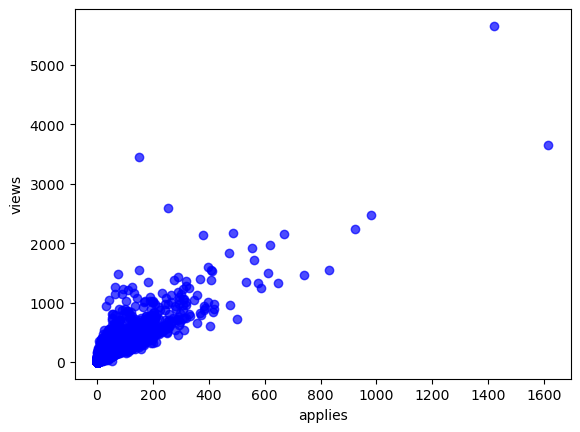

In [ ]:
# Crea el scatter plot
x = df_data['applies']
y = df_data['views']
plt.scatter(x, y, color='blue', alpha=0.7)  # 'alpha' controla la transparencia

# Añade etiquetas y título
plt.xlabel('applies')
plt.ylabel('views')
#plt.title('Scatter Plot de dos variables numéricas')

# Muestra el scatter plot
plt.show()